In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("mnist_train.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

In [5]:
img=df.iloc[1,1:].values
# img

In [6]:
img.size

784

In [7]:
pic=img.reshape(28,28)

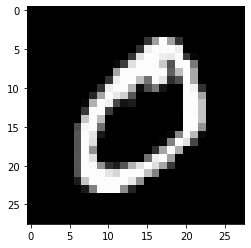

In [8]:
from matplotlib import pyplot as plt
plt.imshow(pic)
plt.gray()
plt.show()

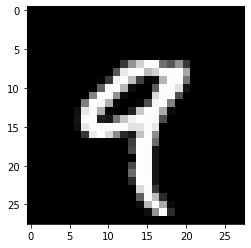

In [9]:
img=df.iloc[4,1:].values
pic=img.reshape(28,28)
plt.imshow(pic)
plt.gray()
plt.show()

In [10]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
x.shape

(60000, 784)

In [12]:
y.shape

(60000,)

In [13]:
y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: 0, Length: 60000, dtype: int64

In [14]:
# scale features

In [15]:
x=x/255

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.utils import to_categorical
from livelossplot import PlotLossesKerasTF

In [17]:
y_encoded=to_categorical(y)

In [18]:
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

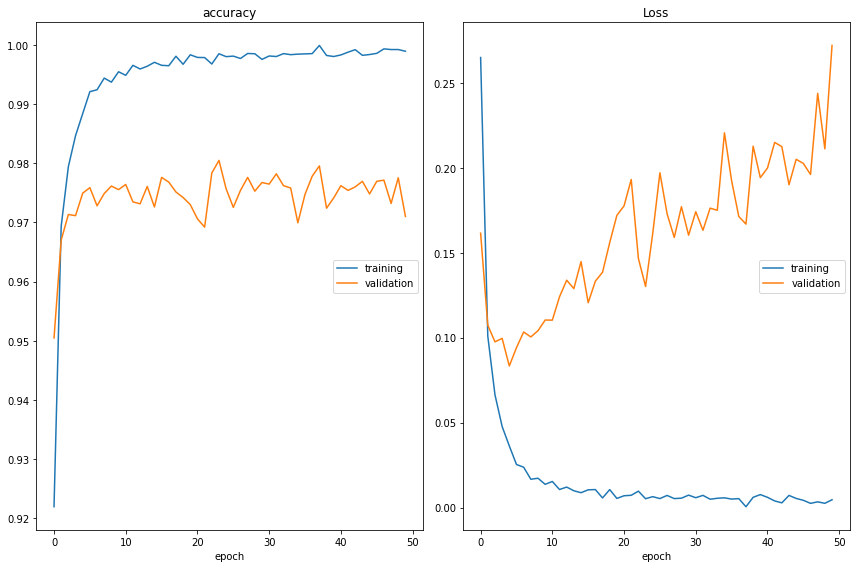

accuracy
	training         	 (min:    0.922, max:    1.000, cur:    0.999)
	validation       	 (min:    0.950, max:    0.980, cur:    0.971)
Loss
	training         	 (min:    0.000, max:    0.265, cur:    0.005)
	validation       	 (min:    0.083, max:    0.272, cur:    0.272)
704/704 [==============================] - 3s 4ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.2720 - val_accuracy: 0.9710


In [19]:
#ANN
mnist_model=Sequential()

mnist_model.add(Input(shape=(784,))) 

mnist_model.add(Dense(256,activation='relu'))
mnist_model.add(Dense(128,activation='relu'))

mnist_model.add(Dense(10,activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

mnist_model.fit(x,y_encoded,epochs=50,batch_size=64,validation_split=0.25,callbacks=[PlotLossesKerasTF()])

In [20]:
# save the model
mnist_model.save('digitclassify.h5')

In [21]:
from sklearn.metrics import classification_report

In [22]:
mnist_model.predict(x)

array([[3.0893656e-34, 2.1034837e-23, 3.0309091e-25, ..., 6.2314998e-29,
        5.0112615e-28, 1.6047530e-21],
       [1.0000000e+00, 2.2328654e-26, 5.3048720e-21, ..., 7.6827151e-26,
        4.8878029e-29, 2.5475176e-23],
       [1.1632954e-22, 8.0202788e-13, 6.0722720e-17, ..., 3.1051182e-17,
        1.0823516e-11, 1.3217631e-12],
       ...,
       [8.3706917e-38, 1.0670628e-32, 5.8516375e-34, ..., 3.7032703e-36,
        7.3089742e-27, 1.4033941e-23],
       [2.1297815e-23, 3.3621549e-29, 6.8240709e-22, ..., 0.0000000e+00,
        7.7276016e-25, 0.0000000e+00],
       [2.0380390e-12, 2.3798518e-16, 3.0019533e-13, ..., 1.4872949e-12,
        1.0000000e+00, 1.6787097e-13]], dtype=float32)

In [23]:
y_pred=mnist_model.predict(x).argmax(axis=1)

In [24]:
y_pred

array([5, 0, 4, ..., 5, 6, 8])

In [25]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      1.00      1.00      6742
           2       0.98      1.00      0.99      5958
           3       0.99      0.99      0.99      6131
           4       1.00      0.99      0.99      5842
           5       1.00      0.99      0.99      5421
           6       0.99      1.00      0.99      5918
           7       0.97      1.00      0.98      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [26]:
testData=pd.read_csv("mnist_test.csv",header=None)

In [27]:
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
testData.shape

(10000, 785)

In [29]:
x_test=testData.iloc[:,1:]
y_test=testData.iloc[:,0]

In [30]:
x_test=x_test/255  # Feature Scaling
y_test_pred=mnist_model.predict(x_test).argmax(axis=1)

In [31]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
# Load and reuse the model
from tensorflow.keras.models import load_model
mnist_model1 = load_model("digitclassify.h5")
y_test_pred=mnist_model1.predict(x_test).argmax(axis=1)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

